In [1]:
#Importing the pandas library for data manipulation and analysis
import pandas as pd

#Loading the dataset from 'segmentationdata.csv' into a DataFrame called 'customer'
customer = pd.read_csv('segmentationdata.csv')

In [2]:
customer

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
# Selecting specific columns from the customer data for clustering and converting them to a numpy array
X = customer.iloc[:,[3,5]].values

In [4]:
X

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]])

In [5]:
# Importing StandardScaler from sklearn for feature scaling
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Standardizing the features (age and income) for clustering
customer_std = scaler.fit_transform(X)
customer_std

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

In [7]:
# Importing KMeans for clustering and warnings to handle warning messages
from sklearn.cluster import KMeans
import warnings

# Using the Elbow method to find the optimal number of clusters (k)
wcss=[] # List to store the within-cluster sum of squares
for i in range(1, 10):
    with warnings.catch_warnings(): #Supressing Warnings
        warnings.simplefilter("ignore")
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20,max_iter=300, random_state=0)
        kmeans.fit(customer_std)
        wcss.append(kmeans.inertia_)
wcss

[4000.000000000001,
 2260.2034732423226,
 1647.5339783881589,
 1281.1446885575544,
 1024.2239108009753,
 865.8957272405526,
 750.9237606214995,
 666.9895182519205,
 583.0465676392924]

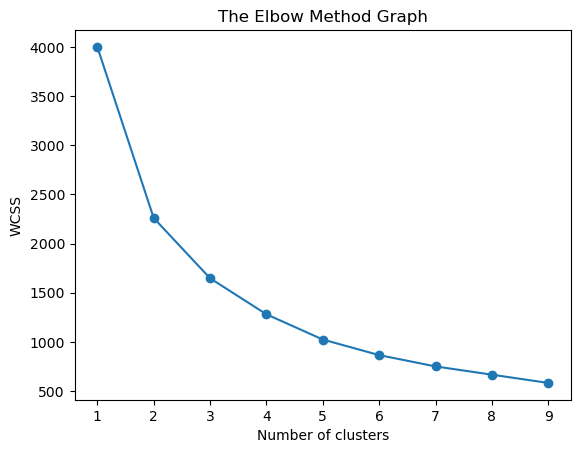

In [8]:
# Visualizing the Elbow Method to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Importing silhouette_score to evaluate the quality of clusters formed
import warnings
from sklearn.metrics import silhouette_score
for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9]:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(customer_std)
        silhouette_avg = silhouette_score(
            customer_std, 
            kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 2 Clusters: 0.4427
Silhouette Score for 3 Clusters: 0.4386
Silhouette Score for 4 Clusters: 0.3502
Silhouette Score for 5 Clusters: 0.3647
Silhouette Score for 6 Clusters: 0.3516
Silhouette Score for 7 Clusters: 0.3576
Silhouette Score for 8 Clusters: 0.3524
Silhouette Score for 9 Clusters: 0.3589


In [10]:
# Creating a KMeans model with 3 clusters for better insights into segmentation
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,random_state=0).fit(customer_std)

In [11]:
# Assigning data points to the identified clusters
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    clusters = km.fit_predict(customer_std)
clusters

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

In [12]:
# Adding a new column 'label' to the customer DataFrame indicating cluster assignment
customer['label'] = clusters
customer

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,label
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,2
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,0


In [13]:
# Creating a DataFrame for centroids of the clusters
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Age','Income'])
centroids

,Age,Income
0,-0.530318,-0.509046
1,-0.005012,1.415503
2,1.485068,0.266995


In [14]:
# Adding a column 'cluster' to label the centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Age,Income,cluster
0,-0.530318,-0.509046,Cluster 0
1,-0.005012,1.415503,Cluster 1
2,1.485068,0.266995,Cluster 2


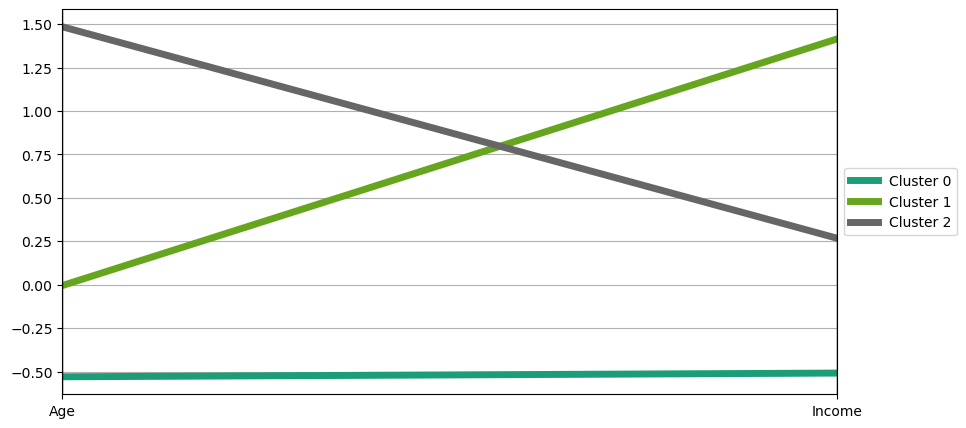

In [15]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D


# Creating a parallel coordinates plot for cluster centroids
plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2',linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/nishkarshgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


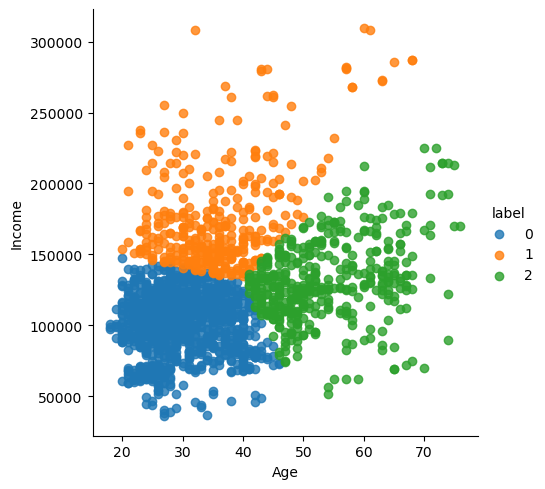

In [16]:
# Creating a scatter plot of Age vs Income colored by cluster labels
import seaborn as sns
sns.lmplot(data=customer, x='Age', y='Income',hue='label', fit_reg=False,legend=True)